In [1]:

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('train1.csv')
df_test=pd.read_csv('test1.csv')

In [3]:
df.columns

Index(['Q8TBG4', 'D00332', '1', '74.95', '0.359', '-0.04', '0.279', '0.341',
       '24.449', '99.599',
       ...
       '-0.23759395', '0.063647665', '-0.36105523', '-0.78949976',
       '-0.46588603', '-0.5293157', '-0.6989974', '-0.952023', '0.6556388',
       '0.23911315'],
      dtype='object', length=2550)

In [4]:
df.shape

(16010, 2550)

In [5]:
df.size

40825500

In [6]:


# Assuming your dataframe is named df and it doesn't have column names initially
# If your dataframe is named differently, replace 'your_dataframe_here' with your dataframe name

# Create column names
column_names = ['ProteinId', 'DrugId', 'label'] + [ 'F'+str(i) for i in range(2547)]

# Assuming data is your dataframe without column names
# data = your_dataframe_without_column_names

# Assign column names to the dataframe
df.columns = column_names

# Now your dataframe has column names 'Drugid', 'protenid', 'label', and remaining columns as '0' to 'n'


In [7]:
df.columns

Index(['ProteinId', 'DrugId', 'label', 'F0', 'F1', 'F2', 'F3', 'F4', 'F5',
       'F6',
       ...
       'F2537', 'F2538', 'F2539', 'F2540', 'F2541', 'F2542', 'F2543', 'F2544',
       'F2545', 'F2546'],
      dtype='object', length=2550)

In [8]:
df.head()

,ProteinId,DrugId,label,F0,F1,F2,F3,F4,F5,F6,...,F2537,F2538,F2539,F2540,F2541,F2542,F2543,F2544,F2545,F2546
0,P42262,ZINC27191322,0,75.538,0.359,-0.012,0.262,0.367,24.915,100.000,...,0.098411,0.609853,-0.267673,-0.212289,-0.063081,0.234073,-0.327776,-0.777139,-0.068785,0.186652
1,I6Y8T4,ZINC96142463,0,75.240,0.490,0.075,0.200,0.303,27.644,100.000,...,-0.141038,0.050899,-0.037386,0.040839,-0.630284,0.954118,0.025331,-0.314066,-0.411639,0.784826
2,P00374,ZINC13809235,0,68.984,0.310,0.045,0.283,0.401,23.529,97.861,...,0.236711,0.737370,-0.518561,0.511849,-0.820826,1.201285,0.370854,-0.434524,-0.433207,0.910684
3,P10826,ZINC26475560,0,74.286,0.398,0.021,0.231,0.332,24.396,99.780,...,0.080137,0.141621,-0.015267,-0.466190,-0.924487,0.557753,-0.239291,-0.065333,-0.234828,0.338684
4,P18545,D00371,1,64.368,0.402,-0.114,0.276,0.310,24.138,100.000,...,-0.026235,0.391962,-0.494508,0.212994,-0.749307,1.100720,0.199427,-0.427526,-0.204516,0.922681


In [9]:
df_test.columns = column_names

In [10]:
X = df.drop(columns=['ProteinId','DrugId','label'])
y=df['label']
X_test = df_test.drop(columns=['ProteinId','DrugId','label'])
y_test=df_test['label']

In [11]:

clf=tree.DecisionTreeClassifier(random_state=42,max_depth=20,min_samples_leaf=10,max_features=1750,min_samples_split=10)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4825   88]
 [ 568 2444]]
Precision: 0.9652448657187994
Recall: 0.8114209827357237
F1-score: 0.8816738816738817
Accuracy: 0.9172239747634069


In [12]:

clf=tree.DecisionTreeClassifier(random_state=42)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4789  124]
 [ 421 2591]]
Precision: 0.9543278084714549
Recall: 0.8602257636122178
F1-score: 0.9048367382573773
Accuracy: 0.931230283911672


In [13]:
tree_depth = clf.tree_.max_depth
print(tree_depth)

62


[Text(0.4353791671948282, 0.9920634920634921, 'x[1125] <= 0.009\ngini = 0.463\nsamples = 16010\nvalue = [10172, 5838]'),
 Text(0.1847334896691596, 0.9761904761904762, 'x[830] <= 0.052\ngini = 0.309\nsamples = 9106\nvalue = [7370, 1736]'),
 Text(0.11420015211053365, 0.9603174603174603, 'x[1680] <= 0.04\ngini = 0.201\nsamples = 7604\nvalue = [6741, 863]'),
 Text(0.09157687919888452, 0.9444444444444444, 'x[703] <= 0.5\ngini = 0.165\nsamples = 7404\nvalue = [6733, 671]'),
 Text(0.06580048168335657, 0.9285714285714286, 'x[2411] <= -0.215\ngini = 0.141\nsamples = 7266\nvalue = [6712, 554]'),
 Text(0.040207884395994424, 0.9126984126984127, 'x[1814] <= -0.029\ngini = 0.11\nsamples = 86\nvalue = [5, 81]'),
 Text(0.03371783496007098, 0.8968253968253969, 'x[479] <= 0.601\ngini = 0.047\nsamples = 83\nvalue = [2, 81]'),
 Text(0.027227785524147546, 0.8809523809523809, 'x[316] <= 0.382\ngini = 0.024\nsamples = 82\nvalue = [1, 81]'),
 Text(0.020737736088224108, 0.8650793650793651, 'x[2443] <= 0.046\ng

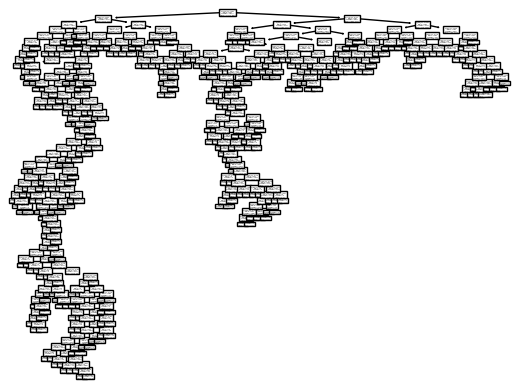

In [14]:
tree.plot_tree(clf)

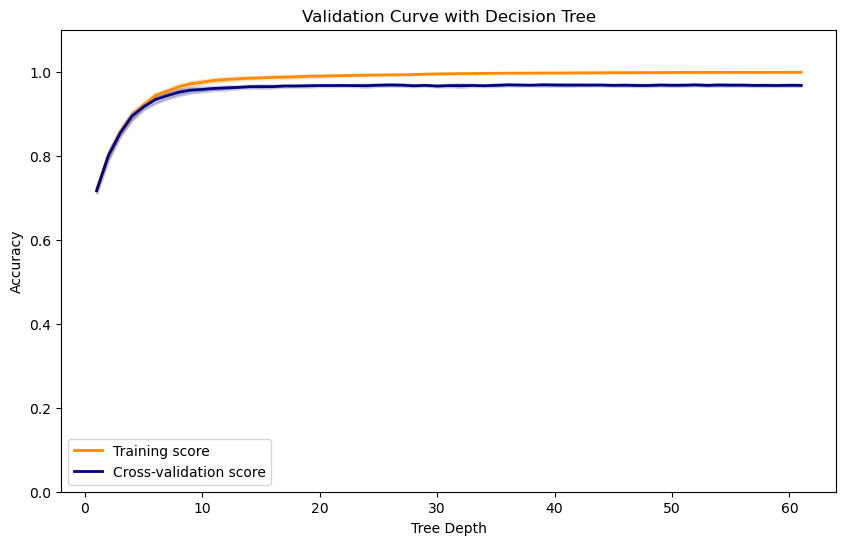

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Define a range of depths to explore
param_range = np.arange(1, 62)

# Create a decision tree classifier

# Compute validation curve for the decision tree classifier
train_scores, valid_scores = validation_curve(
    clf, X, y, param_name="max_depth", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with Decision Tree")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


In [16]:

clf=tree.DecisionTreeClassifier(random_state=42,max_depth=20)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4829   84]
 [ 492 2520]]
Precision: 0.967741935483871
Recall: 0.8366533864541833
F1-score: 0.8974358974358975
Accuracy: 0.9273186119873817


In [17]:

clf=tree.DecisionTreeClassifier(random_state=42,max_depth=25)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4814   99]
 [ 483 2529]]
Precision: 0.9623287671232876
Recall: 0.8396414342629482
F1-score: 0.8968085106382978
Accuracy: 0.9265615141955836


In [18]:

clf=tree.DecisionTreeClassifier(random_state=42,max_depth=40,criterion='entropy')
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4778  135]
 [ 529 2483]]
Precision: 0.9484339190221543
Recall: 0.8243691899070386
F1-score: 0.8820603907637656
Accuracy: 0.9162145110410095


In [19]:

clf=tree.DecisionTreeClassifier(random_state=42,max_depth=40,criterion='log_loss')
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4778  135]
 [ 529 2483]]
Precision: 0.9484339190221543
Recall: 0.8243691899070386
F1-score: 0.8820603907637656
Accuracy: 0.9162145110410095


In [20]:

clf=tree.DecisionTreeClassifier(random_state=42,max_depth=40,)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4803  110]
 [ 421 2591]]
Precision: 0.9592743428359867
Recall: 0.8602257636122178
F1-score: 0.9070540871696131
Accuracy: 0.9329968454258675


In [21]:

clf=tree.DecisionTreeClassifier(random_state=42,max_depth=30,)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4800  113]
 [ 474 2538]]
Precision: 0.957374575631837
Recall: 0.8426294820717132
F1-score: 0.8963446936252869
Accuracy: 0.9259305993690852


In [24]:

clf=tree.DecisionTreeClassifier(random_state=42,max_depth=40,min_samples_leaf=3)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4793  120]
 [ 445 2567]]
Precision: 0.9553405284704131
Recall: 0.852257636122178
F1-score: 0.9008597999649061
Accuracy: 0.9287066246056782


In [26]:

clf=tree.DecisionTreeClassifier(random_state=42,max_depth=40,min_samples_leaf=3,min_samples_split=5)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4793  120]
 [ 445 2567]]
Precision: 0.9553405284704131
Recall: 0.852257636122178
F1-score: 0.9008597999649061
Accuracy: 0.9287066246056782


In [27]:

clf=tree.DecisionTreeClassifier(random_state=42,max_depth=40,min_samples_leaf=3,min_samples_split=5,class_weight='balanced')
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4772  141]
 [ 533 2479]]
Precision: 0.9461832061068702
Recall: 0.8230411686586986
F1-score: 0.8803267045454547
Accuracy: 0.9149526813880127


In [28]:

clf=tree.DecisionTreeClassifier(random_state=42,max_depth=40,class_weight='balanced')
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4771  142]
 [ 563 2449]]
Precision: 0.9451949054419143
Recall: 0.8130810092961488
F1-score: 0.8741745493485633
Accuracy: 0.9110410094637224


In [29]:

clf=tree.DecisionTreeClassifier(random_state=42,max_depth=40,class_weight={0:1,1:1.74})
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4777  136]
 [ 527 2485]]
Precision: 0.9481114078595956
Recall: 0.8250332005312085
F1-score: 0.8823007278537192
Accuracy: 0.9163406940063091


In [30]:

clf=tree.DecisionTreeClassifier(random_state=42,max_depth=40)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4803  110]
 [ 421 2591]]
Precision: 0.9592743428359867
Recall: 0.8602257636122178
F1-score: 0.9070540871696131
Accuracy: 0.9329968454258675


In [32]:

clf=tree.DecisionTreeClassifier(random_state=42,max_depth=40,ccp_alpha=0.0005)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4789  124]
 [ 471 2541]]
Precision: 0.9534709193245778
Recall: 0.8436254980079682
F1-score: 0.8951911220715166
Accuracy: 0.9249211356466877


In [33]:

clf=tree.DecisionTreeClassifier(random_state=42,max_depth=40,ccp_alpha=0.0005)
clf.fit(X,y)
y_predict = clf.predict(X_test)
accuracy_test = accuracy_score(y_test,y_predict )
cm= confusion_matrix(y_test, y_predict)
print(cm)
precision = precision_score(y_test, y_predict )
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)

[[4789  124]
 [ 471 2541]]
Precision: 0.9534709193245778
Recall: 0.8436254980079682
F1-score: 0.8951911220715166
Accuracy: 0.9249211356466877
